limpieza de datos


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, Tag
import requests
import seaborn as sns

In [12]:
#función para escrapear las urls necesarias
def scrapeo(url, anio):

    user={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36"
    }

    datos = []
    response = requests.get(url,headers=user, timeout=10)
    soup=BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all('tr')

    for i in range(1,len(tabla)):#empieza en uno para omitir el primer 'tr', ya que estos son los encabezados
        #aqui se agrega la Nueva URL en el número de iteración que vamos
        nueva_url = f'https://www.planecrashinfo.com/{anio}/{anio}-{i}.htm'
        
        #envíamos otra solicitud para cada url generada
        response_nueva = requests.get(nueva_url, headers=user, timeout=10)

        #procesamos el contenido de la nueva URL como sea necesario
        if response_nueva.status_code == 200:
            soup_nueva = BeautifulSoup(response_nueva.content, "html.parser")
            nueva_tabla = soup_nueva.find('table')

            #creamos la lista de las filas de la tabla
            datos_accidente = {}
            filas = nueva_tabla.find_all('tr')[1:] #comenzamos en el lugar uno para omitir la primera fila
            
            for fila in filas: 
                #extraemos las columnas de cada fila
                celdas = fila.find_all('td')
                if len(celdas) == 2: #seguramos que cada fila tiene dos celdas
                    key = celdas[0].get_text(strip=True).replace(':','')
                    value = celdas[1].get_text(strip=True)
                    datos_accidente[key] = value #almacenamos los datos en el diccionario
            
            #convertimos la lista a DataFrame
            datos.append(datos_accidente) #agregamos cada accidente a lalista
        elif response_nueva.status_code == 404:
            continue
        else: 
            print(f'Error al acceder a la {url}: Código {response_nueva.status_code}')   

    #concatenamos los dataframes
    df_final = pd.DataFrame(datos)
    
    return df_final

In [13]:
df_anual = []

for anio in range(1920,2025):
    print(f'Procesando año {anio}') #imprimimos para ver en que año se encuentra
    url = f'https://www.planecrashinfo.com/{anio}/{anio}.htm'
    df_ = scrapeo(url, anio)

    if not df_.empty:
        df_['Year'] = anio #agregamos el años en una columna
        df_anual.append(df_)
    else:
        print(f'No se encontraron datos para el año {anio}')
        #df_accAviones = pd.concat(df_accAviones, ignore_index=True)
if df_anual:
    df_accAviones = pd.concat(df_anual,ignore_index=True)
else:
    print('no se encontraron datos')

df_accAviones.head()

Procesando año 1920
Procesando año 1921
Procesando año 1922
Procesando año 1923
Procesando año 1924
Procesando año 1925
Procesando año 1926
Procesando año 1927
Procesando año 1928
Procesando año 1929
Procesando año 1930
Procesando año 1931
Procesando año 1932
Procesando año 1933
Procesando año 1934
Procesando año 1935
Procesando año 1936
Procesando año 1937
Procesando año 1938
Procesando año 1939
Procesando año 1940
Procesando año 1941
Procesando año 1942
Procesando año 1943
Procesando año 1944
Procesando año 1945
Procesando año 1946
Procesando año 1947
Procesando año 1948
Procesando año 1949
Procesando año 1950
Procesando año 1951
Procesando año 1952
Procesando año 1953
Procesando año 1954
Procesando año 1955
Procesando año 1956
Procesando año 1957
Procesando año 1958
Procesando año 1959
Procesando año 1960
Procesando año 1961
Procesando año 1962
Procesando año 1963
Procesando año 1964
Procesando año 1965
Procesando año 1966
Procesando año 1967
Procesando año 1968
Procesando año 1969


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


No se encontraron datos para el año 1975
Procesando año 1976
Procesando año 1977
Procesando año 1978
Procesando año 1979
Procesando año 1980
Procesando año 1981
Procesando año 1982
Procesando año 1983
Procesando año 1984
Procesando año 1985
Procesando año 1986
Procesando año 1987
Procesando año 1988
Procesando año 1989
Procesando año 1990
Procesando año 1991
Procesando año 1992
Procesando año 1993
Procesando año 1994
Procesando año 1995
Procesando año 1996
Procesando año 1997
Procesando año 1998
Procesando año 1999
Procesando año 2000
Procesando año 2001
Procesando año 2002
Procesando año 2003
Procesando año 2004
Procesando año 2005
Procesando año 2006
Procesando año 2007
Procesando año 2008
Procesando año 2009
Procesando año 2010
Procesando año 2011
Procesando año 2012
Procesando año 2013
Procesando año 2014
Procesando año 2015
Procesando año 2016
Procesando año 2017
Procesando año 2018
Procesando año 2019
Procesando año 2020
Procesando año 2021
Procesando año 2022
Procesando año 2023

,Date,Time,Location,Operator,Flight #,Route,AC\n Type,Registration,cn / ln,Aboard,Fatalities,Ground,Summary,Year
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",1920
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,1920
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,1920
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,1920
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,1920


In [19]:
df_accAviones.loc[df_accAviones['Year'] == 2020]

,Date,Time,Location,Operator,Flight #,Route,AC\n Type,Registration,cn / ln,Aboard,Fatalities,Ground,Summary,Year
4960,"January 02, 2020",?,"Geneina, Sudan",Sudanese Air Force,?,Geneina - Khartoum,Antonov An12-A,?,2340606,18 (passengers:9 crew:9),18 (passengers:9 crew:9),?,The aircraft crashed shortly after taking off ...,2020
4961,"January 08, 2020",0618,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,38124/5977,176 (passengers:167 crew:9),176 (passengers:167 crew:9),0,The plane took off from Tehran International A...,2020
4962,"February 05, 2020",1819,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,177 (passengers:171 crew:6),3 (passengers:3 crew:0),0,While landing duriing high winds and heavey ra...,2020
4963,"March 29, 2020",2000,"Manila, Philippines",Lion Air Inc.,?,Manila - Tokyo,IAI 1124A Westwind II,RP-C5880,353,8 (passengers:5 crew:3),8 (passengers:5 crew:3),0,The air ambulance crashed on takeoff from runw...,2020
4964,"May 22, 2020",1440,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,AP-BLD,2274,99 (passengers:91 crew:8),97 (passengers:89 crew:8),1,"While landing, the aircraft scraped the runway...",2020
4965,"August 07, 2020",1914,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,VT-AXH,36323/2108,190 (passengers:184 crew:6),20 (passengers:18 crew:2),0,The flight IX344 suffered a runway excursion w...,2020
4966,"August 22, 2020",0840,"Juba, South Sudan",South West Aviaiton,?,Juba - Wau,Antonov 26B,EX-126,11508,8 (passengers:5 crew:3),7 (passengers:4 crew:3),0,The cargo plane lost height shortly after depa...,2020
4967,"September 25, 2020",2050,"Near Chuguev, Ukraine",Military - Ukraine Air Force,?,Training,Antonov An26SH,76 yellow,5608,27 (passengers:20 crew:7),26 (passengers:19 crew:7),0,"The military transport, crashed 1.2 miles from...",2020


In [20]:
#procedemos a guardar el DF en un archivo parquet y csv
df_accAviones.to_parquet('Data/accidentes_aereos_scrapeados.parquet', engine='pyarrow', index=False)
df_accAviones.to_csv('Data/accidentes_aereos_scrapeados.csv', encoding='utf-8')

In [13]:
df_accAviones = pd.read_csv('Data\\accidentes_aereos_scrapeados.csv', encoding='utf-8')

* Las columnas son de tipo objeto, así que habrá que transformarlas al tipo de datos necesario para cada una

* de igual forma cambiaremos los nombres para una mejor interpretación de lo que que contiene cada columna

* Eliminamos columnas innecesarias o que no nos serán de ayuda por falta de información

* Reemplazamos '?' por nulos

* extracción de las columnas Aboard y Fatalities 


In [14]:
#función para extraer de las columnas de aboard y fatalities los totales 
def extraer_totales(celda):
    try:
        #verificamos si el total es un número
        total = int(celda.split()[0]) if celda.split()[0].isdigit() else None
        
        #extraemos pasajeros y tripulación si están presentes en la celda
        pasajeros = None
        if 'passengers:' in celda:
            pasajeros_str = celda.split('passengers:')[1].split()[0]
            pasajeros = int(pasajeros_str) if pasajeros_str.isdigit() else None
        
        tripulacion = None
        if 'crew:' in celda:
            tripulacion_str = celda.split('crew:')[1].split(')')[0] 
            tripulacion = int(tripulacion_str) if tripulacion_str.isdigit() else None
        
        #si el total no está presente, calculaos el total como la suma de pasajeros y tripulación
        if total is None and pasajeros is not None and tripulacion is not None:
            total = pasajeros + tripulacion

    except (IndexError, ValueError):
        
        #si hay un error al parsear, devolvemos None para cada valor
        total, pasajeros, tripulacion = None, None, None

    return total, pasajeros, tripulacion

#aplicamos la función a las columnas y creamos las nuevas columnas
df_accAviones['Total Aboard'], df_accAviones['Passengers Aboard'], df_accAviones['Crew Aboard'] = zip(*df_accAviones['Aboard'].apply(extraer_totales))

df_accAviones['Total Fatalities'], df_accAviones['Passengers Fatalities'], df_accAviones['Crew Fatalities'] = zip(*df_accAviones['Fatalities'].apply(extraer_totales))

df_accAviones.head()

,Unnamed: 0,Date,Time,Location,Operator,Flight #,Route,AC\n Type,Registration,cn / ln,...,Fatalities,Ground,Summary,Year,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",1920,2.0,1.0,1.0,1.0,1.0,0.0
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,1920,1.0,0.0,1.0,1.0,0.0,0.0
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,...,5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,1920,5.0,0.0,5.0,5.0,0.0,5.0
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,...,1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,1920,1.0,0.0,1.0,1.0,0.0,1.0
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,...,14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,1920,20.0,NaN,NaN,14.0,NaN,NaN


In [15]:
df_accAviones.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Location', 'Operator', 'Flight #',
       'Route', 'AC\n        Type', 'Registration', 'cn / ln', 'Aboard',
       'Fatalities', 'Ground', 'Summary', 'Year', 'Total Aboard',
       'Passengers Aboard', 'Crew Aboard', 'Total Fatalities',
       'Passengers Fatalities', 'Crew Fatalities'],
      dtype='object')

In [16]:
#procedemos a contar la cantidad de '?' que se encuentran en el df
signos = (df_accAviones == '?').sum() #o  signos = (df_accAviones == '?').sum().sum()
print(f'la cantidad de signos son: {signos}')

la cantidad de signos son: Unnamed: 0                  0
Date                        0
Time                     1496
Location                    5
Operator                   11
Flight #                 3663
Route                     756
AC\n        Type           15
Registration              276
cn / ln                   662
Aboard                      0
Fatalities                  0
Ground                     44
Summary                    58
Year                        0
Total Aboard                0
Passengers Aboard           0
Crew Aboard                 0
Total Fatalities            0
Passengers Fatalities       0
Crew Fatalities             0
dtype: int64


In [17]:
#reemplazamos los valores ? por None
for cols in df_accAviones.columns:
    df_accAviones[cols] = df_accAviones[cols].replace('?',None)

#verificamos la cantidad de nulos, para conocer que columnas podrían ser eliminadas
(df_accAviones.isnull().sum()/ len(df_accAviones)* 100).round(2)

Unnamed: 0                0.00
Date                      0.00
Time                     29.95
Location                  0.10
Operator                  0.22
Flight #                 73.33
Route                    15.16
AC\n        Type          0.30
Registration              5.53
cn / ln                  13.25
Aboard                    0.00
Fatalities                0.00
Ground                    0.88
Summary                   1.16
Year                      0.00
Total Aboard              0.34
Passengers Aboard         4.42
Crew Aboard               4.38
Total Fatalities          0.16
Passengers Fatalities     4.68
Crew Fatalities           4.68
dtype: float64

In [18]:
#Eliminamos columnas que no necesitaremos y las que tienen mayor cantidad de nulos en este caso se eliminará Time y el flight #
#además de elimnar 'Aboard' y 'Fatalities' ya que ya no serán necesarios 
df_accAviones.drop(columns=['Unnamed: 0','Time', 'Flight #','Aboard',
       'Fatalities', 'Summary'], inplace=True)

#Eliminamos los registros con valores None, ya que no nos serán de ayuda
df_accAviones.dropna(inplace=True)
df_accAviones.columns

Index(['Date', 'Location', 'Operator', 'Route', 'AC\n        Type',
       'Registration', 'cn / ln', 'Ground', 'Year', 'Total Aboard',
       'Passengers Aboard', 'Crew Aboard', 'Total Fatalities',
       'Passengers Fatalities', 'Crew Fatalities'],
      dtype='object')

In [19]:
#verificamos nulos 
df_accAviones.isna().sum()

Date                     0
Location                 0
Operator                 0
Route                    0
AC\n        Type         0
Registration             0
cn / ln                  0
Ground                   0
Year                     0
Total Aboard             0
Passengers Aboard        0
Crew Aboard              0
Total Fatalities         0
Passengers Fatalities    0
Crew Fatalities          0
dtype: int64

In [20]:
#cambiamos los tipos de datos en la columna Date
df_accAviones['Date'] = pd.to_datetime(df_accAviones['Date'])

In [21]:
#ya que conocimos que columnas tenían mayor porcentaje de nulos ahora podemos cambiar los tipos de datos 
df_accAviones['Total Aboard'] = df_accAviones['Total Aboard'].astype(int)
df_accAviones['Passengers Aboard'] = df_accAviones['Passengers Aboard'].astype(int)
df_accAviones['Crew Aboard'] = df_accAviones['Crew Aboard'].astype(int)
df_accAviones['Total Fatalities'] = df_accAviones['Total Fatalities'].astype(int)
df_accAviones['Passengers Fatalities'] = df_accAviones['Passengers Fatalities'].astype(int)
df_accAviones['Crew Fatalities'] = df_accAviones['Crew Fatalities'].astype(int)
df_accAviones['Ground'] = df_accAviones['Ground'].astype(int)

df_accAviones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 49 to 4994
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3818 non-null   datetime64[ns]
 1   Location               3818 non-null   object        
 2   Operator               3818 non-null   object        
 3   Route                  3818 non-null   object        
 4   AC
        Type        3818 non-null   object        
 5   Registration           3818 non-null   object        
 6   cn / ln                3818 non-null   object        
 7   Ground                 3818 non-null   int32         
 8   Year                   3818 non-null   int64         
 9   Total Aboard           3818 non-null   int32         
 10  Passengers Aboard      3818 non-null   int32         
 11  Crew Aboard            3818 non-null   int32         
 12  Total Fatalities       3818 non-null   int32         
 13  Passeng

In [22]:
#cambiamos nombres de las columnas

df_accAviones.rename(columns={
    'Date':'Fecha', 'Location': 'Ubicacion', 'Operator':'Operador',
    'Route': 'Ruta', 'AC\n        Type': 'Tipo Avion', 'Registration': 'Num Registro',
    'Ground': 'Total Muertes en Suelo', 'Year':'Año',
    'Total Aboard': 'Total Abordo', 'Passengers Aboard': 'Pasajeros abordo',
    'Crew Aboard': 'Tripulación Abordo', 'Total Fatalities': 'Total Muertes',
    'Passengers Fatalities': 'Muertes Pasajeros', 'Crew Fatalities': 'Muertes Tripulacion'
},inplace=True)

#verificamos el cambio 
df_accAviones.columns

Index(['Fecha', 'Ubicacion', 'Operador', 'Ruta', 'Tipo Avion', 'Num Registro',
       'cn / ln', 'Total Muertes en Suelo', 'Año', 'Total Abordo',
       'Pasajeros abordo', 'Tripulación Abordo', 'Total Muertes',
       'Muertes Pasajeros', 'Muertes Tripulacion'],
      dtype='object')

In [23]:
df_accAviones.to_csv('Data\\accidentes_aereos_procesados.csv', encoding='utf-8')

### EDA ###

In [24]:
#seleccionamos las columnas con los valores numericos
df_numerico = df_accAviones.select_dtypes(include=['int'])

In [25]:
#vemos los datos estadísticos, trasponemos los datos para verlos más compactos
round(df_numerico.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Total Muertes en Suelo,3818.0,2.01,63.21,0.0,0.0,0.0,0.0,2750.0
Año,3818.0,1973.86,23.89,1920.0,1955.0,1972.0,1994.0,2024.0
Total Abordo,3818.0,35.23,49.88,0.0,8.0,18.0,40.0,644.0
Pasajeros abordo,3818.0,30.55,47.70,0.0,4.0,14.0,35.0,614.0
Tripulación Abordo,3818.0,4.70,3.54,0.0,2.0,4.0,6.0,61.0
Total Muertes,3818.0,24.87,38.55,0.0,4.0,12.0,28.0,583.0
Muertes Pasajeros,3818.0,21.26,36.85,0.0,2.0,9.0,24.0,560.0
Muertes Tripulacion,3818.0,3.69,3.12,0.0,2.0,3.0,5.0,33.0


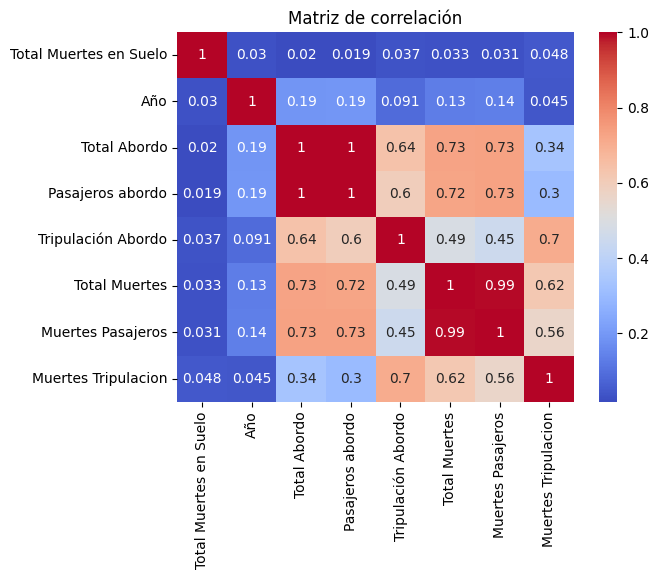

In [26]:
matriz = df_accAviones.select_dtypes(include='number') #calculamos la matriz de correlación
matriz = matriz.corr()
#visualizamos la matriz de correlación

sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se puede ver que la correlación más fuerte está entre las variables de total de muertes y muertes de pasajeros, así como en total abordo y pasajeros abbordo, mientras que la variable de muertees en suelo es la que tiene relación casi nula

In [27]:
#ve4rificamos cuales son las variables categoricas
var_categoricas = df_accAviones.select_dtypes(include=['object'])
var_categoricas.columns.tolist()

['Ubicacion', 'Operador', 'Ruta', 'Tipo Avion', 'Num Registro', 'cn / ln']

In [29]:
df_accAviones[['Ubicacion',
 'Operador',
 'Ruta',
 'Tipo Avion',
 'Num Registro',
 'cn / ln']].head()

,Ubicacion,Operador,Ruta,Tipo Avion,Num Registro,cn / ln
49,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25
61,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160
62,"Near Murchinson River, Australia",West Australian Airways,Geraldton - Derby,Bristol 28 Tourer,G-AUDI,6116
66,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4
68,"Off Folkestone, Kent, England",Cie des Messageries Aeriennes,Croydon - Paris,Bleriot Spad 27,F-ACMH,555


In [30]:
#verificamos cuántas veces aparece una ubicación en el df
for col in var_categoricas.columns:
    conteo = df_accAviones[col].value_counts()
    print(f'Variable {col}')
    print(conteo)

Variable Ubicacion
Ubicacion
Moscow, Russia            15
New York, New York        12
Manila, Philippines       11
Rio de Janeiro, Brazil    11
Sao Paulo, Brazil         11
                          ..
Ndola, Zambia              1
Mt. Canigou, France        1
El Adem, Libya             1
Les Prevosts, Guernsey     1
Pohuwato, Indonesia        1
Name: count, Length: 3188, dtype: int64
Variable Operador
Operador
Aeroflot                     216
Military - U.S. Air Force     95
Air France                    58
United Air Lines              42
Deutsche Lufthansa            38
                            ... 
Security Air                   1
Columbia Pacific Airlines      1
Uruguayan Air Force            1
SADELCA                        1
SAM Air                        1
Name: count, Length: 1871, dtype: int64
Variable Ruta
Ruta
Training                       78
Sightseeing                    28
Test flight                    18
Sao Paulo - Rio de Janeiro      7
Rio de Janeiro - Sao Paulo 

In [31]:
#Generamos una nueva columna para conocer la tasa de mortalidad
df_accAviones['Tasa Mortalidad'] = df_accAviones['Total Muertes']/df_accAviones['Total Abordo']
df_accAviones.head(2)

,Fecha,Ubicacion,Operador,Ruta,Tipo Avion,Num Registro,cn / ln,Total Muertes en Suelo,Año,Total Abordo,Pasajeros abordo,Tripulación Abordo,Total Muertes,Muertes Pasajeros,Muertes Tripulacion,Tasa Mortalidad
49,1920-12-14,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,0,1920,8,6,2,4,2,2,0.5
61,1921-09-06,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,0,1921,5,4,1,5,4,1,1.0


In [32]:
#Se genera una columna para la ciudad a partir de la calumna RUta
df_accAviones['Ciudad'] = df_accAviones['Ruta'].str.split('-').str[0]

#visualizamos
df_accAviones.head(2)

,Fecha,Ubicacion,Operador,Ruta,Tipo Avion,Num Registro,cn / ln,Total Muertes en Suelo,Año,Total Abordo,Pasajeros abordo,Tripulación Abordo,Total Muertes,Muertes Pasajeros,Muertes Tripulacion,Tasa Mortalidad,Ciudad
49,1920-12-14,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,0,1920,8,6,2,4,2,2,0.5,London
61,1921-09-06,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,0,1921,5,4,1,5,4,1,1.0,Warsaw


Exportamos los datos ya limpios

In [33]:
df_accAviones.to_csv('Data\\accidentes_aereos_procesados.csv', encoding='utf-8')